In [1]:
#load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import math
from sklearn.cluster import KMeans

In [2]:
#load the dataset. I want to load both original and cleaned datasets
dfmallcustomer= pd.read_csv("datasets/Mall_Customers.csv")
dfcleaned= pd.read_csv("datasets/dfmallcustomer.csv")

In [3]:
#select age, annual income, and spending scores
x = dfmallcustomer.iloc[:,2:]

In [4]:
x.shape

(200, 3)

In [5]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


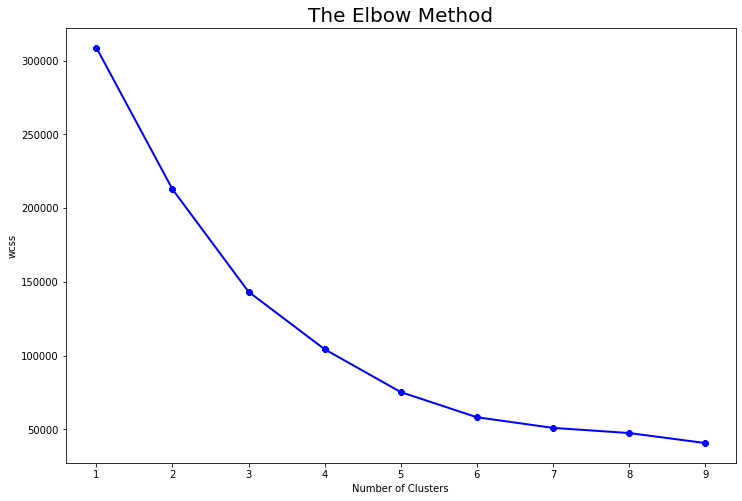

In [6]:
#elbow method. resources: https://medium.com/@ODSC/unsupervised-learning-evaluating-clusters-bd47eed175ce
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

wcss = [] #Within Cluster Sum of Squared Errors 
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, tol=0.0001, verbose=0, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(1,10), wcss, linewidth=2, color="blue", marker ="8")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.xticks(np.arange(1,10,1))
plt.show()

In [7]:
#It seems 5 cluster is the number of clusters I need to select. I am going to create k-means clustering with 5 clusters
#https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D 

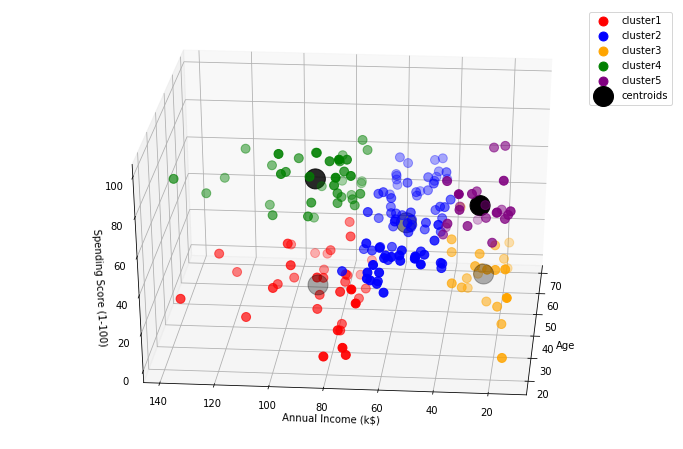

In [8]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(x)
dfmallcustomer["label"] = clusters
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 0], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 0], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 0], c='red', s=80, label='cluster1')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 1], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 1], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 1], c='blue', s=80, label='cluster2')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 2], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 2], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 2], c='orange', s=80, label='cluster3')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 3], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 3], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 3], c='green', s=80, label='cluster4')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 4], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 4], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 4], c='purple', s=80, label='cluster5')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s=400,c='black',label='centroids')


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()


__INTERPRETATION__: __Cluster1 (red cluster):__ Generally people older than 40 years old with lower annual income and lower spending score.

__Cluster2 (blue cluster):__ Generally people between 20-50 years old with more than 80k annual income and moderate spending score.

__Cluster3 (orange cluster):__ These are the people who are spreaded in terms of age. It seems that their centroids are about 60 years old. But they have higher annual income (80k and more) but don't spend too much.

__Cluster4 (green cluster):__ These customers do not have either very high or low annual income. They are spreaded to all ages. They also do not have either very high or low spending scores.

__Cluster5 (purple cluster):__ These customers have the lowest population. They are younger with lower annual income. Their spending score is moderate. 

__CONCLUSION__

Young people spend more even when they have lower annual income. On the other hand, older people spend less even when their annual income is 80k and more. However, this analysis do not tell me a lot about the customers even though I can say that main marketing strategy should  focus on younger people. Adding what found in data storytelling, my main recomendation would be that marketing strategies should be designed around females who are 20-50 years old. There are some overlaps so that I will apply another clustering algorightm to check the number of clusters.



In [9]:
#I want to use hierarchical clustering. First I need to load required libraries dendogram and linkage
from scipy.cluster.hierarchy import dendrogram, linkage

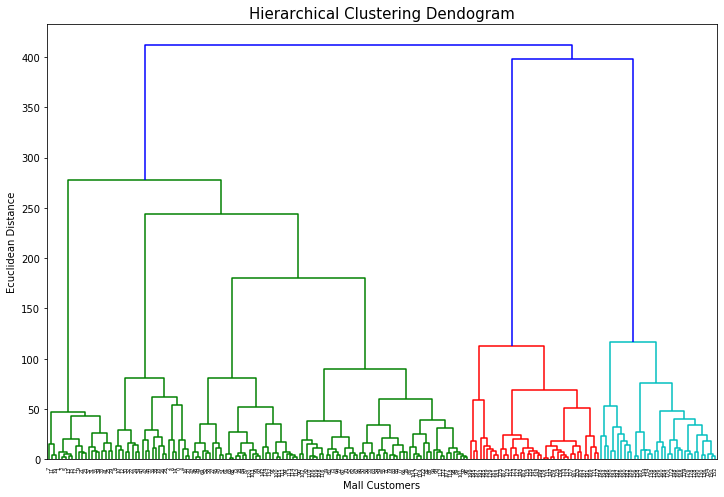

In [10]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
y = linkage(x, method='ward', metric='euclidean', optimal_ordering=False)
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(y)
plt.title('Hierarchical Clustering Dendogram', fontsize = 15)
plt.xlabel('Mall Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

__INTERPRETATION:__ This was what I have been suspected about. I think it could be possible to think 3 clusters rather than 5 cluster. As seen in the dendogram above, all green customers merge together at some points. So, I will create three clusters this time to see how it looks like. 

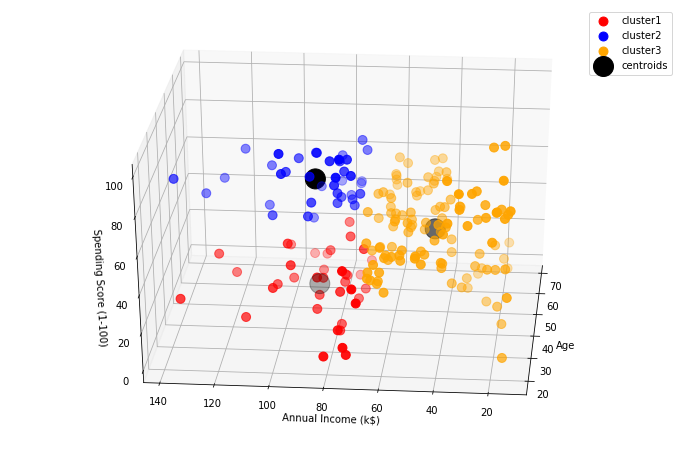

In [11]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(x)
dfmallcustomer["label"] = clusters
 
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 0], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 0], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 0], c='red', s=80, label='cluster1')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 1], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 1], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 1], c='blue', s=80, label='cluster2')
ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 2], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 2], 
           dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 2], c='orange', s=80, label='cluster3')
#ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 3], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 3], 
           #dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 3], c='green', s=80, label='cluster4')
#ax.scatter(dfmallcustomer.Age[dfmallcustomer.label == 4], dfmallcustomer["Annual Income (k$)"][dfmallcustomer.label == 4], 
           #dfmallcustomer["Spending Score (1-100)"][dfmallcustomer.label == 4], c='purple', s=80, label='cluster5')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2], s=400,c='black',label='centroids')


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
plt.show()

__INTERPRETATION:__ Even though, some blue and orange ones overlap, three clusters are also as clear as 5 clusters model. Based on the plot above, I would say that the mall business owners should target the blue cluster who represent younger people with higher annual income. This is pretty similar to what I found with five clusters but more obvious than that.